# 1- Import Libraries

In [285]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
sns.set_style("whitegrid")
import shap
import xgboost
import optuna
from itertools import product
import statsmodels.api as sm
from tqdm import tqdm
import plotly.graph_objects as go
import plotly.figure_factory as ff


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor , AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier,XGBRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeClassifier, RidgeClassifierCV
from sklearn.metrics import mean_squared_error


from imblearn.over_sampling import SMOTENC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier as cb

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.utils import plot_model
from keras.models import load_model, Model
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam, SGD
from tensorflow.keras.optimizers import Adam, SGD

import warnings
warnings.filterwarnings('ignore')

seed = 42

In [135]:
from IPython.display import HTML, display

nf_open = HTML('''
    <iframe src='https://flo.uri.sh/visualisation/8563393/embed' title='Interactive or visual content' class='flourish-embed-iframe' frameborder='0' scrolling='no' style='width:100%;height:600px;' sandbox='allow-same-origin allow-forms allow-scripts allow-downloads allow-popups allow-popups-to-escape-sandbox allow-top-navigation-by-user-activation'></iframe><div style='width:100%!;margin-top:4px!important;text-align:right!important;'><a class='flourish-credit' href='https://public.flourish.studio/visualisation/8563393/?utm_source=embed&utm_campaign=visualisation/8563393' target='_top' style='text-decoration:none!important'><img alt='Made with Flourish' src='https://public.flourish.studio/resources/made_with_flourish.svg' style='width:105px!important;height:16px!important;border:none!important;margin:0!important;'> </a></div>
''')

nf_hl = HTML('''
   <iframe src='https://flo.uri.sh/visualisation/8563684/embed' title='Interactive or visual content' class='flourish-embed-iframe' frameborder='0' scrolling='no' style='width:100%;height:600px;' sandbox='allow-same-origin allow-forms allow-scripts allow-downloads allow-popups allow-popups-to-escape-sandbox allow-top-navigation-by-user-activation'></iframe><div style='width:100%!;margin-top:4px!important;text-align:right!important;'><a class='flourish-credit' href='https://public.flourish.studio/visualisation/8563684/?utm_source=embed&utm_campaign=visualisation/8563684' target='_top' style='text-decoration:none!important'><img alt='Made with Flourish' src='https://public.flourish.studio/resources/made_with_flourish.svg' style='width:105px!important;height:16px!important;border:none!important;margin:0!important;'> </a></div>
''')

nf_ltp = HTML('''
   <iframe src='https://flo.uri.sh/visualisation/8568346/embed' title='Interactive or visual content' class='flourish-embed-iframe' frameborder='0' scrolling='no' style='width:100%;height:900px;' sandbox='allow-same-origin allow-forms allow-scripts allow-downloads allow-popups allow-popups-to-escape-sandbox allow-top-navigation-by-user-activation'></iframe><div style='width:100%!;margin-top:4px!important;text-align:right!important;'><a class='flourish-credit' href='https://public.flourish.studio/visualisation/8568346/?utm_source=embed&utm_campaign=visualisation/8568346' target='_top' style='text-decoration:none!important'><img alt='Made with Flourish' src='https://public.flourish.studio/resources/made_with_flourish.svg' style='width:105px!important;height:16px!important;border:none!important;margin:0!important;'> </a></div>
''')

nf_tv = HTML('''
    <iframe src='https://flo.uri.sh/visualisation/8568407/embed' title='Interactive or visual content' class='flourish-embed-iframe' frameborder='0' scrolling='no' style='width:100%;height:600px;' sandbox='allow-same-origin allow-forms allow-scripts allow-downloads allow-popups allow-popups-to-escape-sandbox allow-top-navigation-by-user-activation'></iframe><div style='width:100%!;margin-top:4px!important;text-align:right!important;'><a class='flourish-credit' href='https://public.flourish.studio/visualisation/8568407/?utm_source=embed&utm_campaign=visualisation/8568407' target='_top' style='text-decoration:none!important'><img alt='Made with Flourish' src='https://public.flourish.studio/resources/made_with_flourish.svg' style='width:105px!important;height:16px!important;border:none!important;margin:0!important;'> </a></div>
''')

nf_chng = HTML('''
    <iframe src='https://flo.uri.sh/visualisation/8568447/embed' title='Interactive or visual content' class='flourish-embed-iframe' frameborder='0' scrolling='no' style='width:100%;height:600px;' sandbox='allow-same-origin allow-forms allow-scripts allow-downloads allow-popups allow-popups-to-escape-sandbox allow-top-navigation-by-user-activation'></iframe><div style='width:100%!;margin-top:4px!important;text-align:right!important;'><a class='flourish-credit' href='https://public.flourish.studio/visualisation/8568447/?utm_source=embed&utm_campaign=visualisation/8568447' target='_top' style='text-decoration:none!important'><img alt='Made with Flourish' src='https://public.flourish.studio/resources/made_with_flourish.svg' style='width:105px!important;height:16px!important;border:none!important;margin:0!important;'> </a></div>
''')

nf_w = HTML('''
    <iframe src='https://flo.uri.sh/visualisation/8568465/embed' title='Interactive or visual content' class='flourish-embed-iframe' frameborder='0' scrolling='no' style='width:100%;height:600px;' sandbox='allow-same-origin allow-forms allow-scripts allow-downloads allow-popups allow-popups-to-escape-sandbox allow-top-navigation-by-user-activation'></iframe><div style='width:100%!;margin-top:4px!important;text-align:right!important;'><a class='flourish-credit' href='https://public.flourish.studio/visualisation/8568465/?utm_source=embed&utm_campaign=visualisation/8568465' target='_top' style='text-decoration:none!important'><img alt='Made with Flourish' src='https://public.flourish.studio/resources/made_with_flourish.svg' style='width:105px!important;height:16px!important;border:none!important;margin:0!important;'> </a></div>
''')

# 2- Read Dataset

In [273]:
nf = pd.read_csv('/kaggle/input/nifty50-stocks-dataset/National_Stock_Exchange_of_India_Ltd.csv')
nf

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
0,ADANIPORTS,750,766,713.25,715,-47.45,-6.22,72.20,532.63,901,384.4,79.22,-4.65
1,ASIANPAINT,"3,101.00","3,167.35","3,091.00","3,138.00",-6.25,-0.20,10.29,322.53,"3,505.00","2,117.15",45.66,5.66
2,AXISBANK,669,674.9,660.45,661,-18.90,-2.78,102.53,684,866.9,568.4,10.19,-21.49
3,BAJAJ-AUTO,"3,370.00","3,383.50","3,320.00","3,335.00",-56.70,-1.67,3.42,114.59,"4,361.40","3,041.00",9.30,-12.05
4,BAJAJFINSV,"17,200.00","17,237.20","16,610.00","16,684.00",-684.85,-3.94,3.42,576.79,"19,325.00","8,273.70",91.38,-9.10
5,BAJFINANCE,"7,021.00","7,047.90","6,775.00","6,780.00",-345.80,-4.85,16.89,"1,161.63","8,050.00","4,362.00",44.57,-13.69
6,BHARTIARTL,763,763,733.1,735.85,-29.30,-3.83,111.43,830.06,781.8,454.11,58.55,5.70
7,BPCL,397.15,397.2,375,377.4,-22.70,-5.67,100.23,383.54,503,357,-1.22,-12.45
8,BRITANNIA,"3,560.00","3,635.10","3,533.95","3,566.60",-6.80,-0.19,3.73,133.23,"4,153.00","3,317.30",0.30,-3.42
9,CIPLA,892,976.05,890.65,965,65.05,7.23,144.59,"1,380.90","1,005.00",726.5,31.89,6.34


# 3- Convert Types

In [274]:
nf['Open'] = nf['Open'].str.replace(',','')
nf['Open'] = nf['Open'].astype(float)

nf['High'] = nf['High'].str.replace(',','')
nf['High'] = nf['High'].astype(float)

nf['Low'] = nf['Low'].str.replace(',','')
nf['Low'] = nf['Low'].astype(float)

nf['LTP'] = nf['LTP'].str.replace(',','')
nf['LTP'] = nf['LTP'].astype(float)

nf['Turnover (crs.)'] = nf['Turnover (crs.)'].str.replace(',','')
nf['Turnover (crs.)'] = nf['Turnover (crs.)'].astype(float)

nf['52w H'] = nf['52w H'].str.replace(',','')
nf['52w H'] = nf['52w H'].astype(float)

nf['52w L'] = nf['52w L'].str.replace(',','')
nf['52w L'] = nf['52w L'].astype(float)

nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Symbol           50 non-null     object 
 1   Open             50 non-null     float64
 2   High             50 non-null     float64
 3   Low              50 non-null     float64
 4   LTP              50 non-null     float64
 5   Chng             50 non-null     float64
 6   % Chng           50 non-null     float64
 7   Volume (lacs)    50 non-null     float64
 8   Turnover (crs.)  50 non-null     float64
 9   52w H            50 non-null     float64
 10  52w L            50 non-null     float64
 11  365 d % chng     50 non-null     float64
 12  30 d % chng      50 non-null     float64
dtypes: float64(12), object(1)
memory usage: 5.2+ KB


# 4- Statistics

In [19]:
nf.describe(percentiles=[0.1, 0.25, 0.75, 0.9, 0.95]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,max
Open,50.0,2985.7390,5024.412163,125.60,226.415,673.0000,1155.950,2760.2625,7070.900,12857.5000,26450.00
High,50.0,3017.2610,5057.739037,125.60,227.540,678.4250,1156.750,2789.4250,7095.110,12900.0100,26539.90
Low,50.0,2914.2080,4911.417131,120.50,220.870,662.1125,1105.750,2668.5375,6810.500,12452.0450,25812.00
LTP,50.0,2939.5690,4943.921262,121.15,221.490,663.1875,1121.250,2690.4500,6817.000,12505.5025,25900.00
Chng,50.0,-70.1330,163.203678,-770.50,-131.510,-66.7750,-29.975,-7.8125,-2.560,68.8450,158.40
% Chng,50.0,-2.9302,2.677007,-7.48,-5.722,-4.5275,-3.300,-1.9325,-0.190,1.7770,7.23
Volume (lacs),50.0,71.2666,93.462062,0.30,3.699,13.4725,30.750,99.2000,152.422,248.7950,517.88
Turnover (crs.),50.0,569.7068,492.383108,76.94,132.691,195.8975,463.430,744.5025,1262.685,1390.3920,2430.36
52w H,50.0,3440.5880,5813.045344,141.50,259.765,777.8250,1456.125,3388.0000,8071.900,14394.3500,32048.00
52w L,50.0,2208.5568,3962.991087,77.05,154.718,391.8375,819.775,2272.6000,4402.800,7430.5350,22531.00


# 5- Unique Values

In [21]:
for col in nf:
    print("Column : ", col)
    print(f"Value counts of {col}: ",nf[col].value_counts().sum())
    print(f"Number of Unique Values in {col}: ",nf[col].nunique())
    print()

Column :  Symbol
Value counts of Symbol:  50
Number of Unique Values in Symbol:  50

Column :  Open
Value counts of Open:  50
Number of Unique Values in Open:  50

Column :  High
Value counts of High:  50
Number of Unique Values in High:  50

Column :  Low
Value counts of Low:  50
Number of Unique Values in Low:  50

Column :  LTP
Value counts of LTP:  50
Number of Unique Values in LTP:  50

Column :  Chng
Value counts of Chng:  50
Number of Unique Values in Chng:  50

Column :  % Chng
Value counts of % Chng:  50
Number of Unique Values in % Chng:  48

Column :  Volume (lacs)
Value counts of Volume (lacs):  50
Number of Unique Values in Volume (lacs):  49

Column :  Turnover (crs.)
Value counts of Turnover (crs.):  50
Number of Unique Values in Turnover (crs.):  50

Column :  52w H
Value counts of 52w H:  50
Number of Unique Values in 52w H:  50

Column :  52w L
Value counts of 52w L:  50
Number of Unique Values in 52w L:  50

Column :  365 d % chng
Value counts of 365 d % chng:  50
Nu

In [31]:
nft=nf.select_dtypes(exclude=['object']).columns
nft

Index(['Open', 'High', 'Low', 'LTP', 'Chng', '% Chng', 'Volume (lacs)',
       'Turnover (crs.)', '52w H', '52w L', '365 d % chng', '30 d % chng'],
      dtype='object')

# 6- Visualization

Column :  Open
Column :  High
Column :  Low
Column :  LTP
Column :  Chng
Column :  % Chng
Column :  Volume (lacs)
Column :  Turnover (crs.)
Column :  52w H
Column :  52w L
Column :  365 d % chng
Column :  30 d % chng


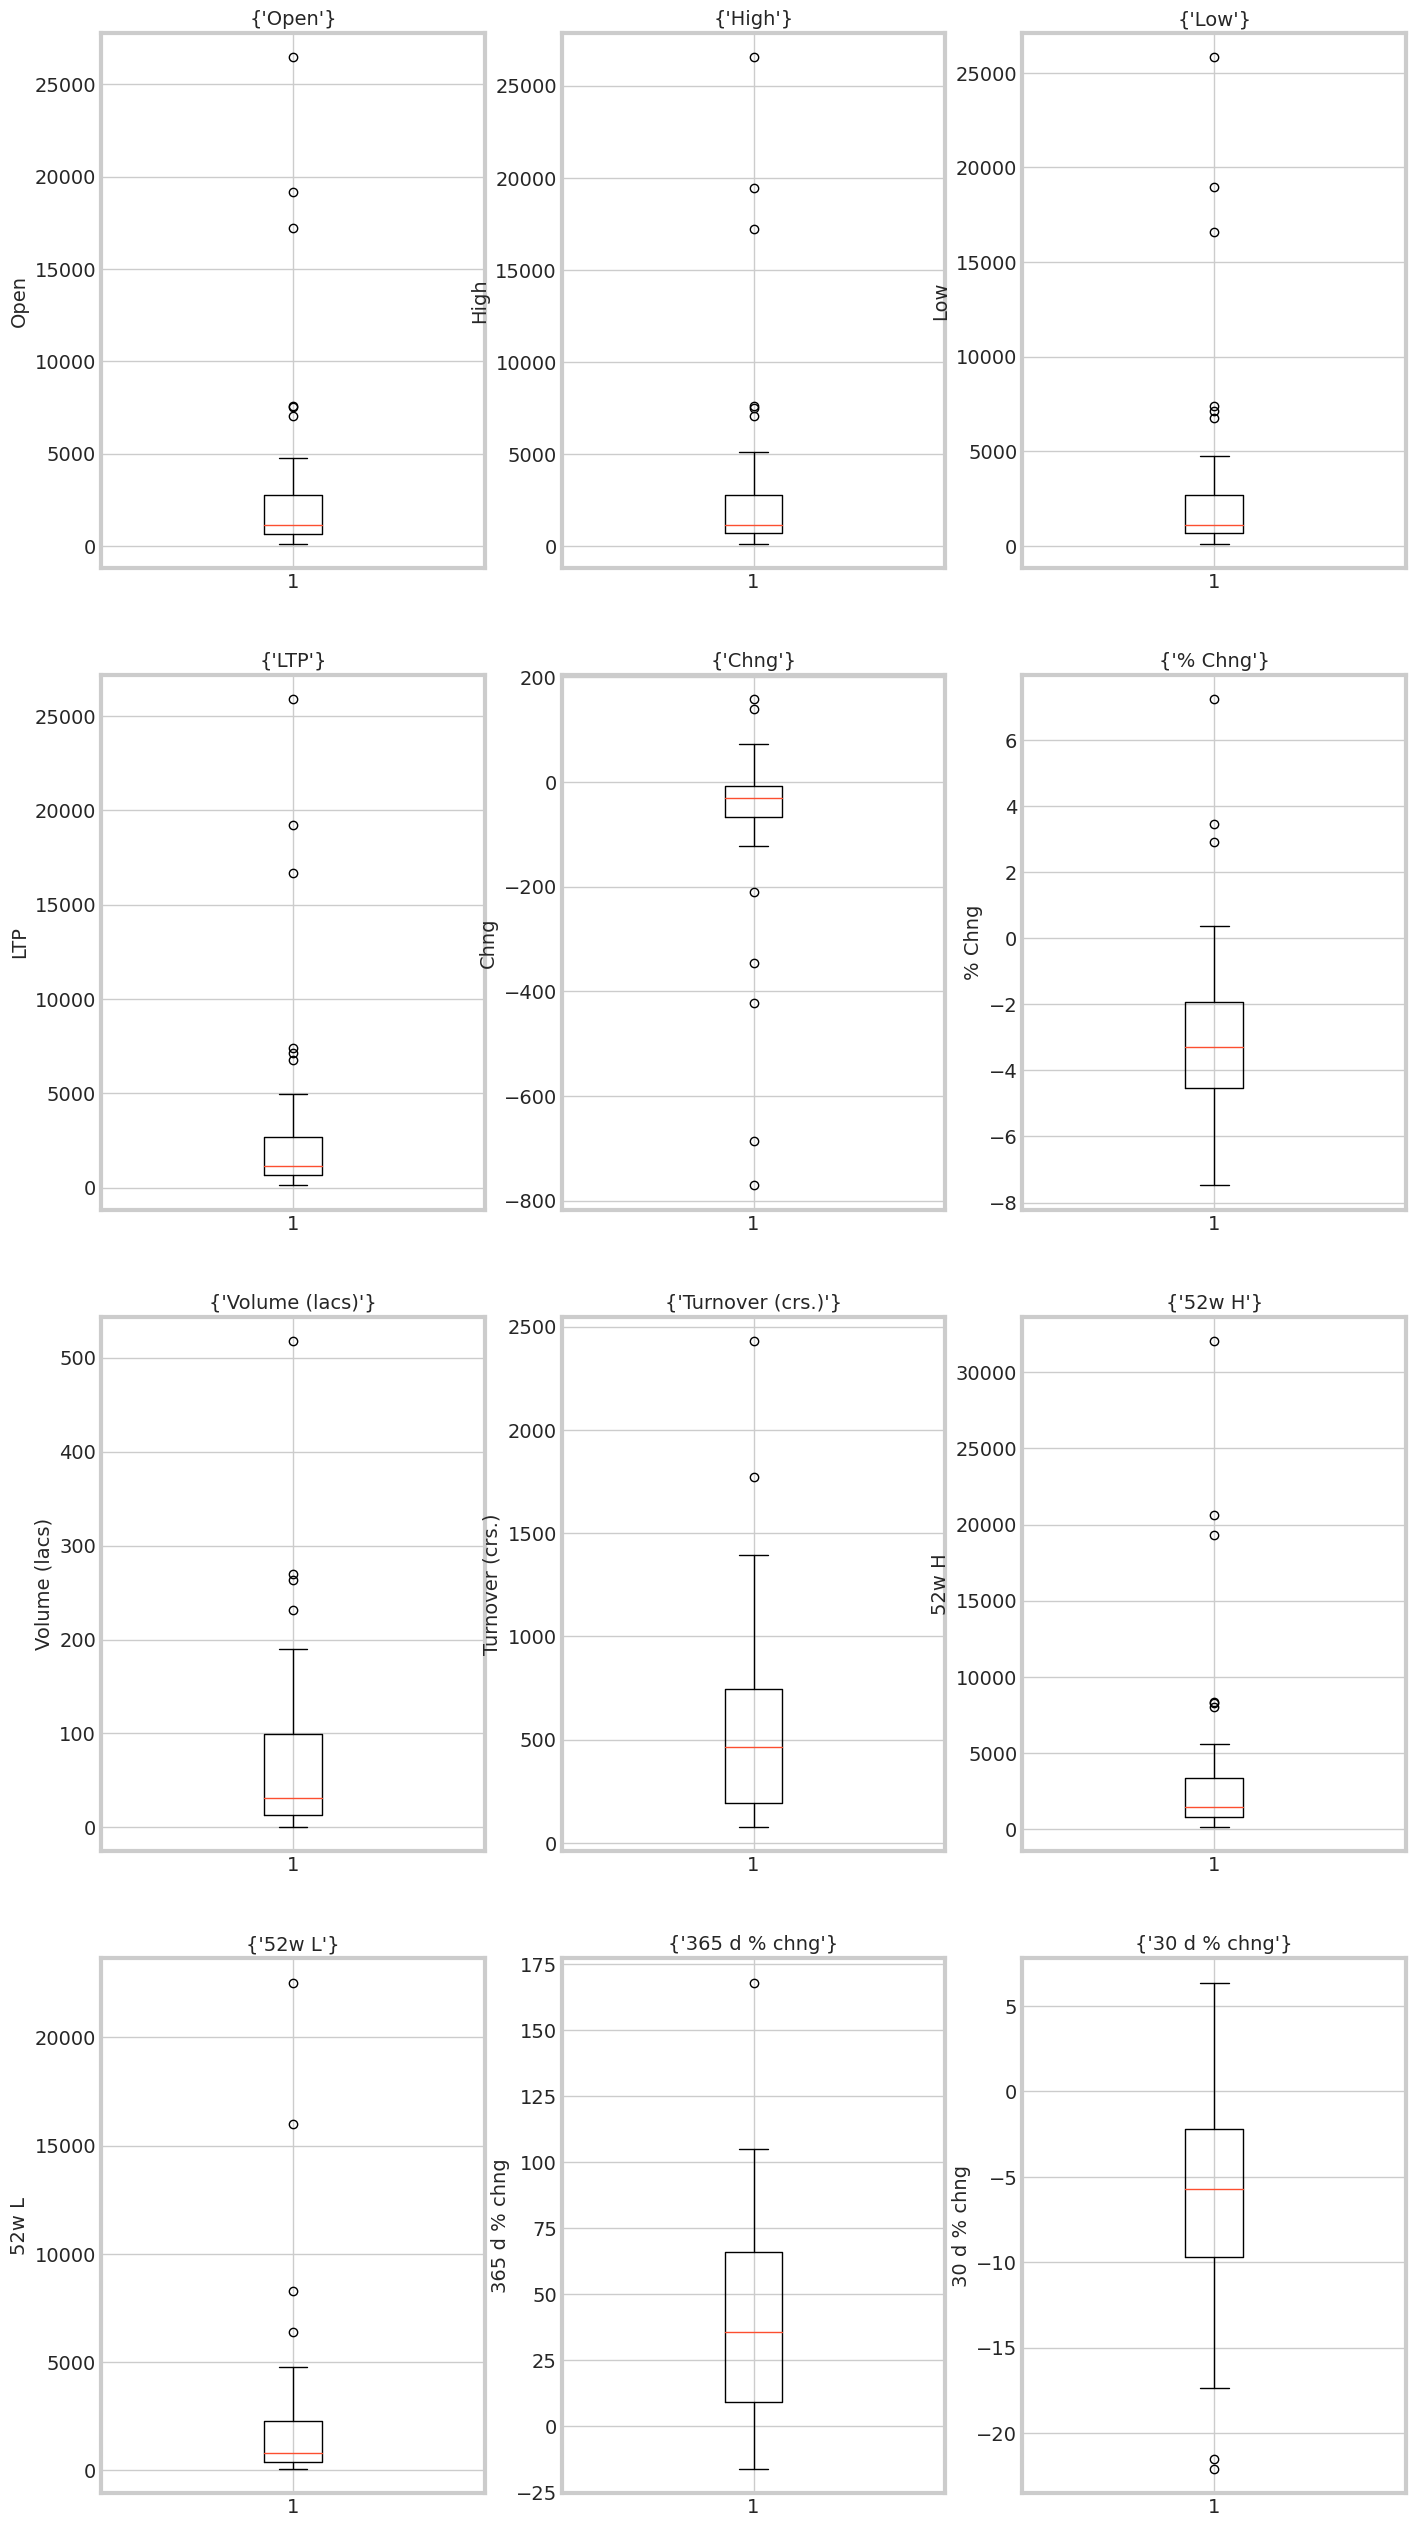

In [92]:
for col in nft:
    print("Column : ", col)
    
n_rows, n_cols = 4, 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(15,20))

for i, num_col in enumerate(num_cols):
    i, j = i//n_cols, i%n_cols
        
    ax[i,j].set_title({num_col}, fontsize=14)
    ax[i,j].set_ylabel(f"{num_col}", fontsize="medium")
    ax[i,j].set_xlabel("")
    
    ax[i,j].boxplot(nf[num_col])

fig.subplots_adjust(top=1.3)
fig.show()

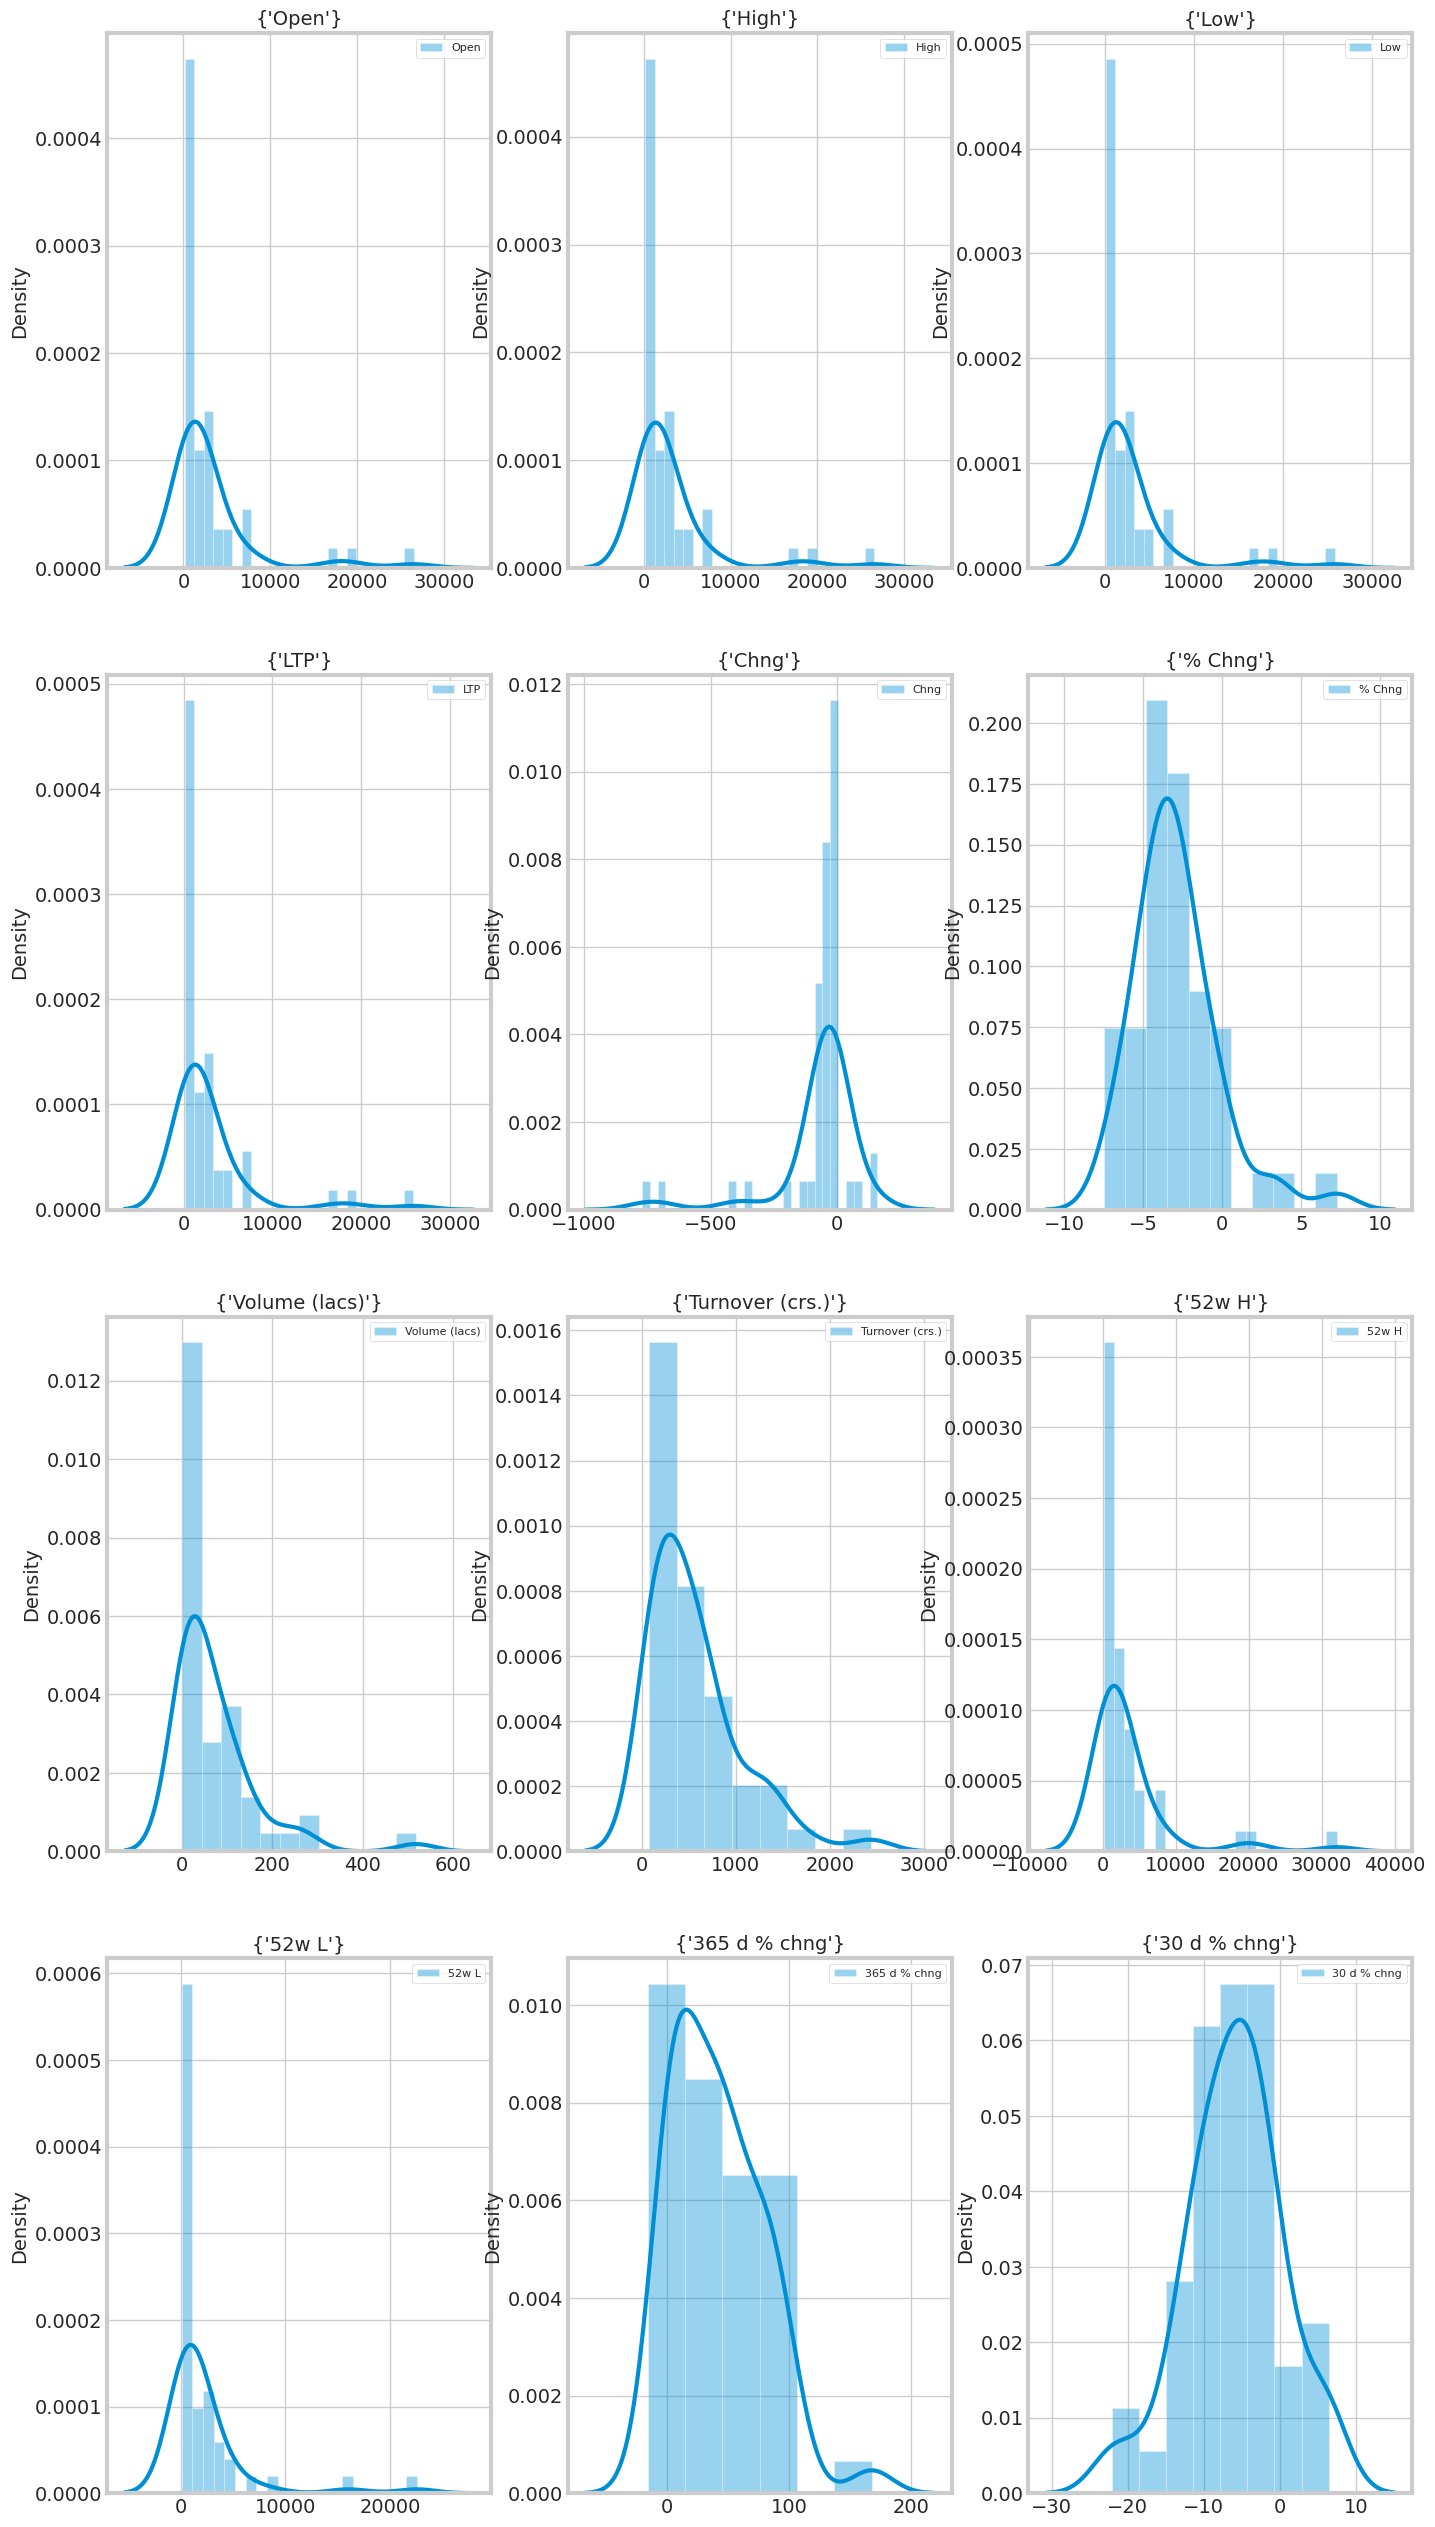

In [136]:
n_rows, n_cols = 4, 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(15,20))

for i, num_col in enumerate(num_cols):
    i, j = i//n_cols, i%n_cols
    
    figure = sns.distplot(nf[num_col], label=num_col, norm_hist=True, ax=ax[i,j], kde_kws={"lw":3})
    figure = figure.legend(loc='best', fontsize=8)
        
    ax[i,j].set_title({num_col}, fontsize=14)
    ax[i,j].set_ylabel("Density", fontsize="medium")
    ax[i,j].set_xlabel("")

fig.subplots_adjust(top=1.3)
fig.show()

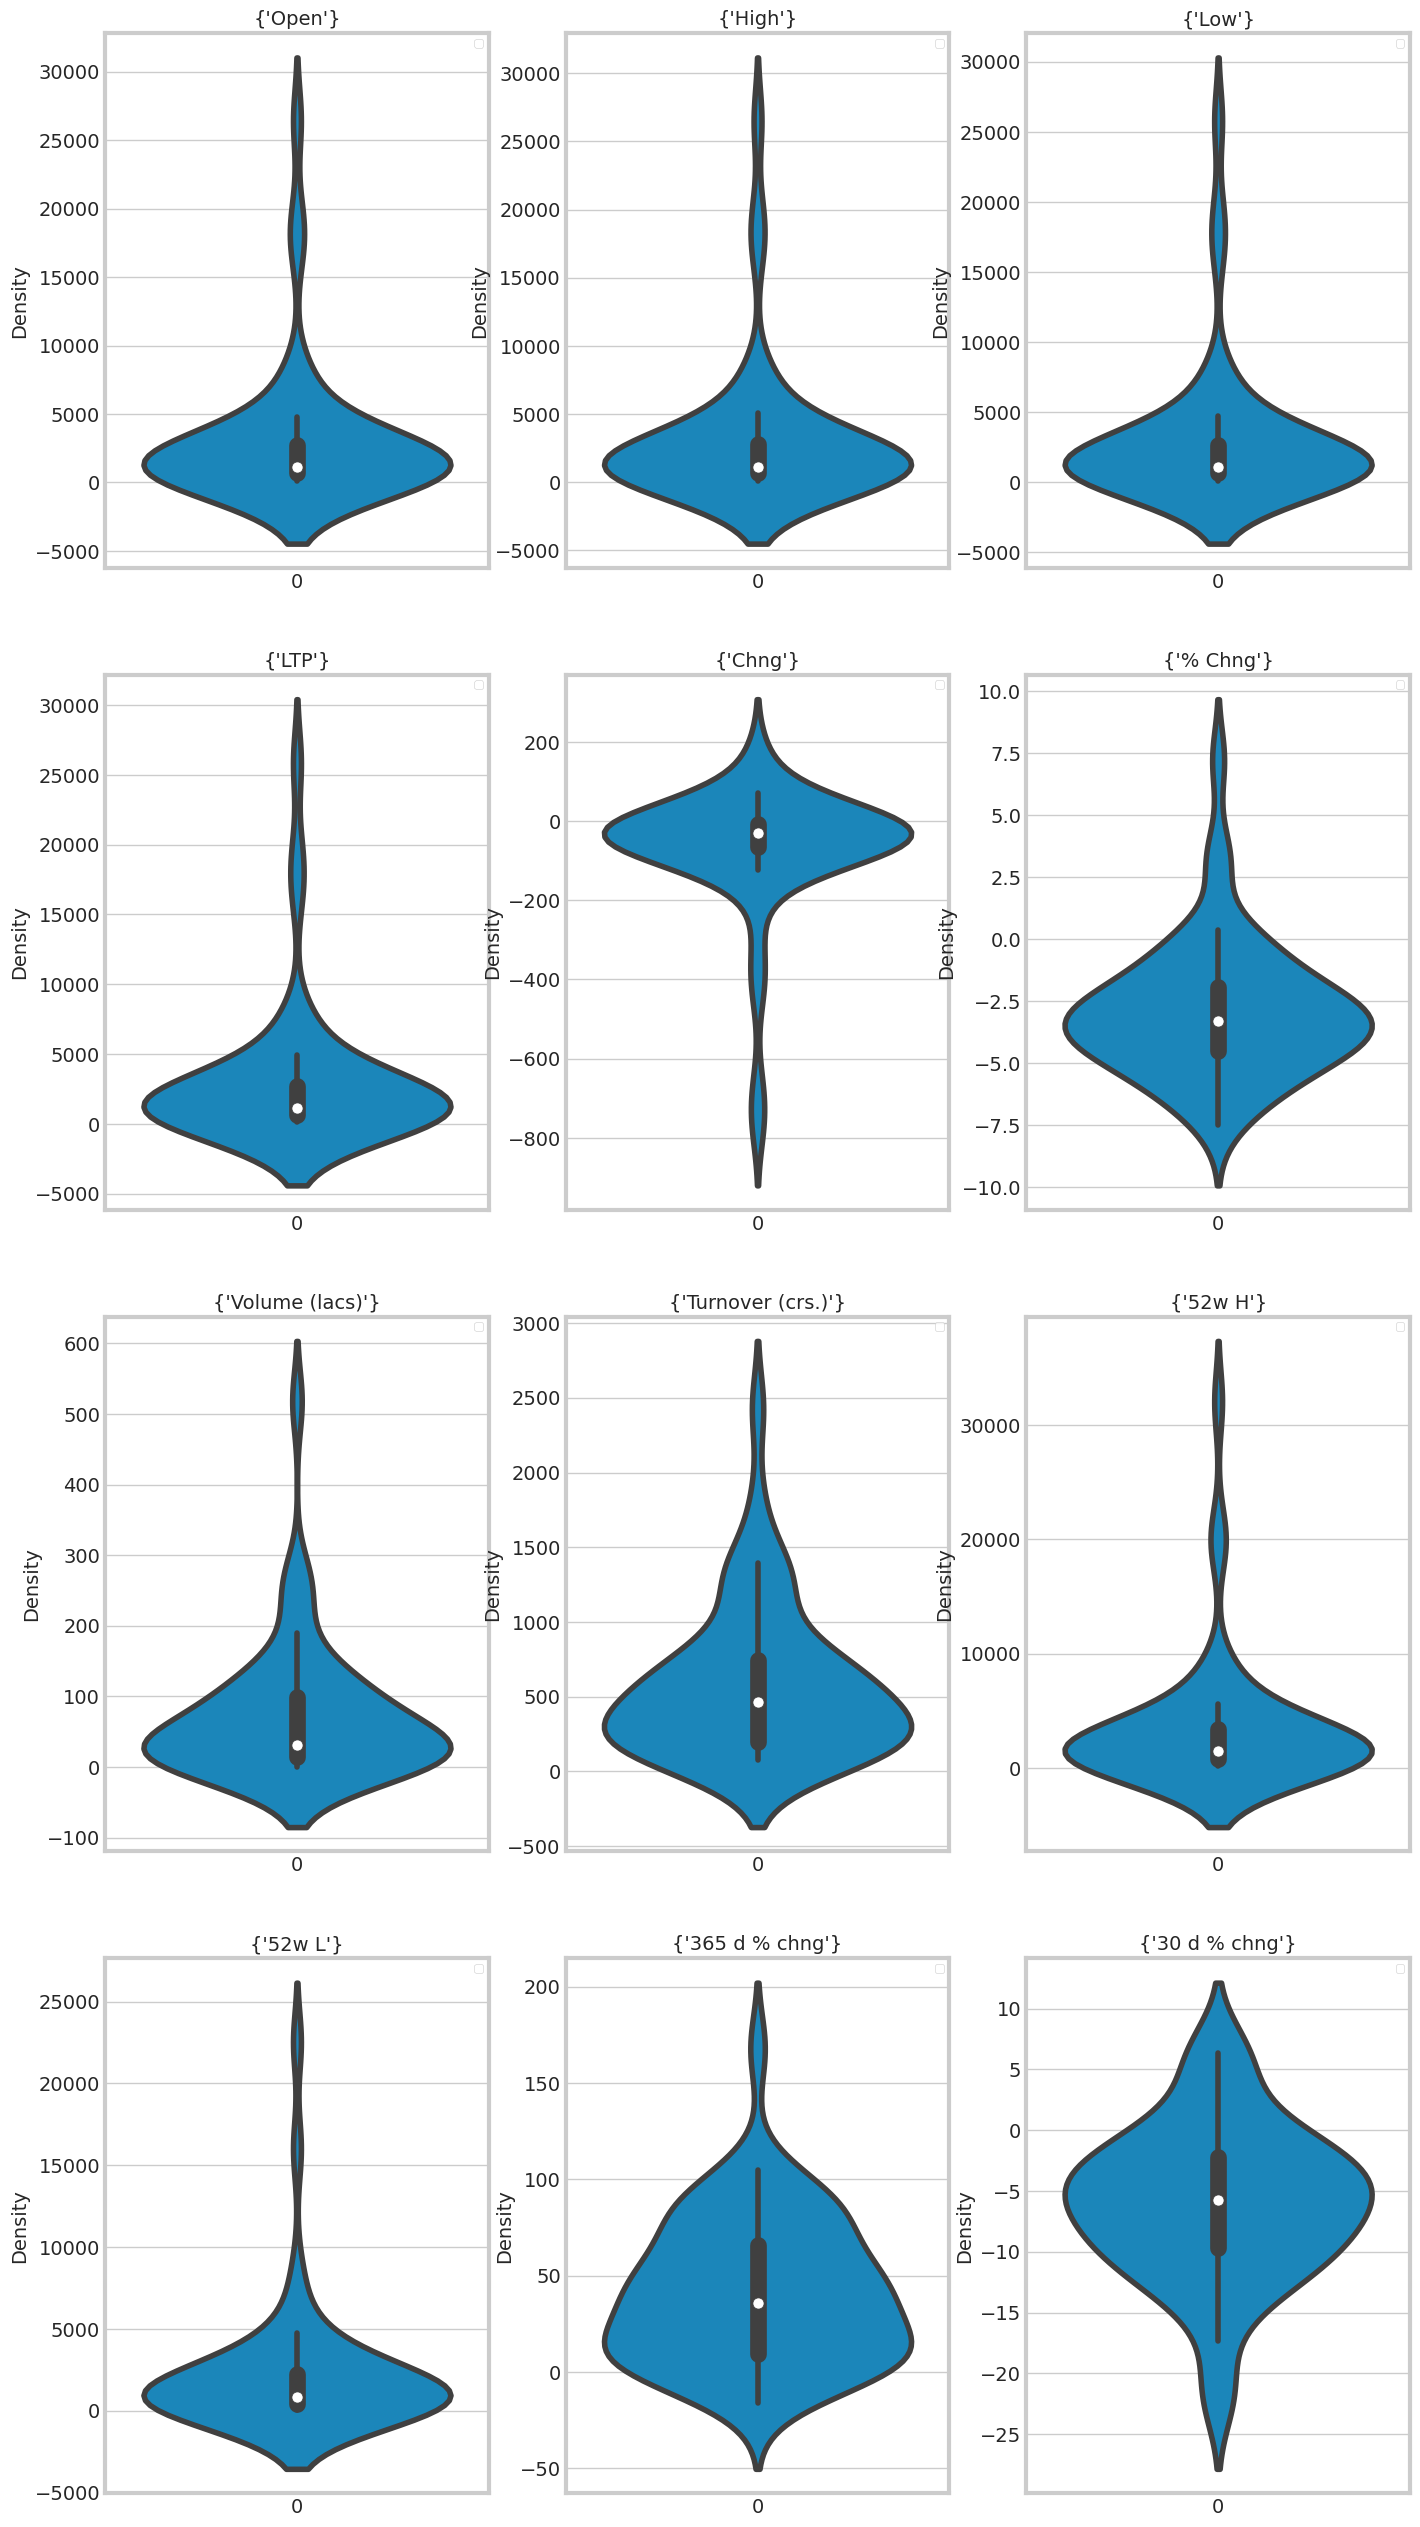

In [137]:
n_rows, n_cols = 4, 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(15,20))

for i, num_col in enumerate(num_cols):
    i, j = i//n_cols, i%n_cols
    
    figure = sns.violinplot(nf[num_col], label=num_col, norm_hist=True, ax=ax[i,j], kde_kws={"lw":3})
    figure = figure.legend(loc='best', fontsize=8)
        
    ax[i,j].set_title({num_col}, fontsize=14)
    ax[i,j].set_ylabel("Density", fontsize="medium")
    ax[i,j].set_xlabel("")

fig.subplots_adjust(top=1.3)
fig.show()

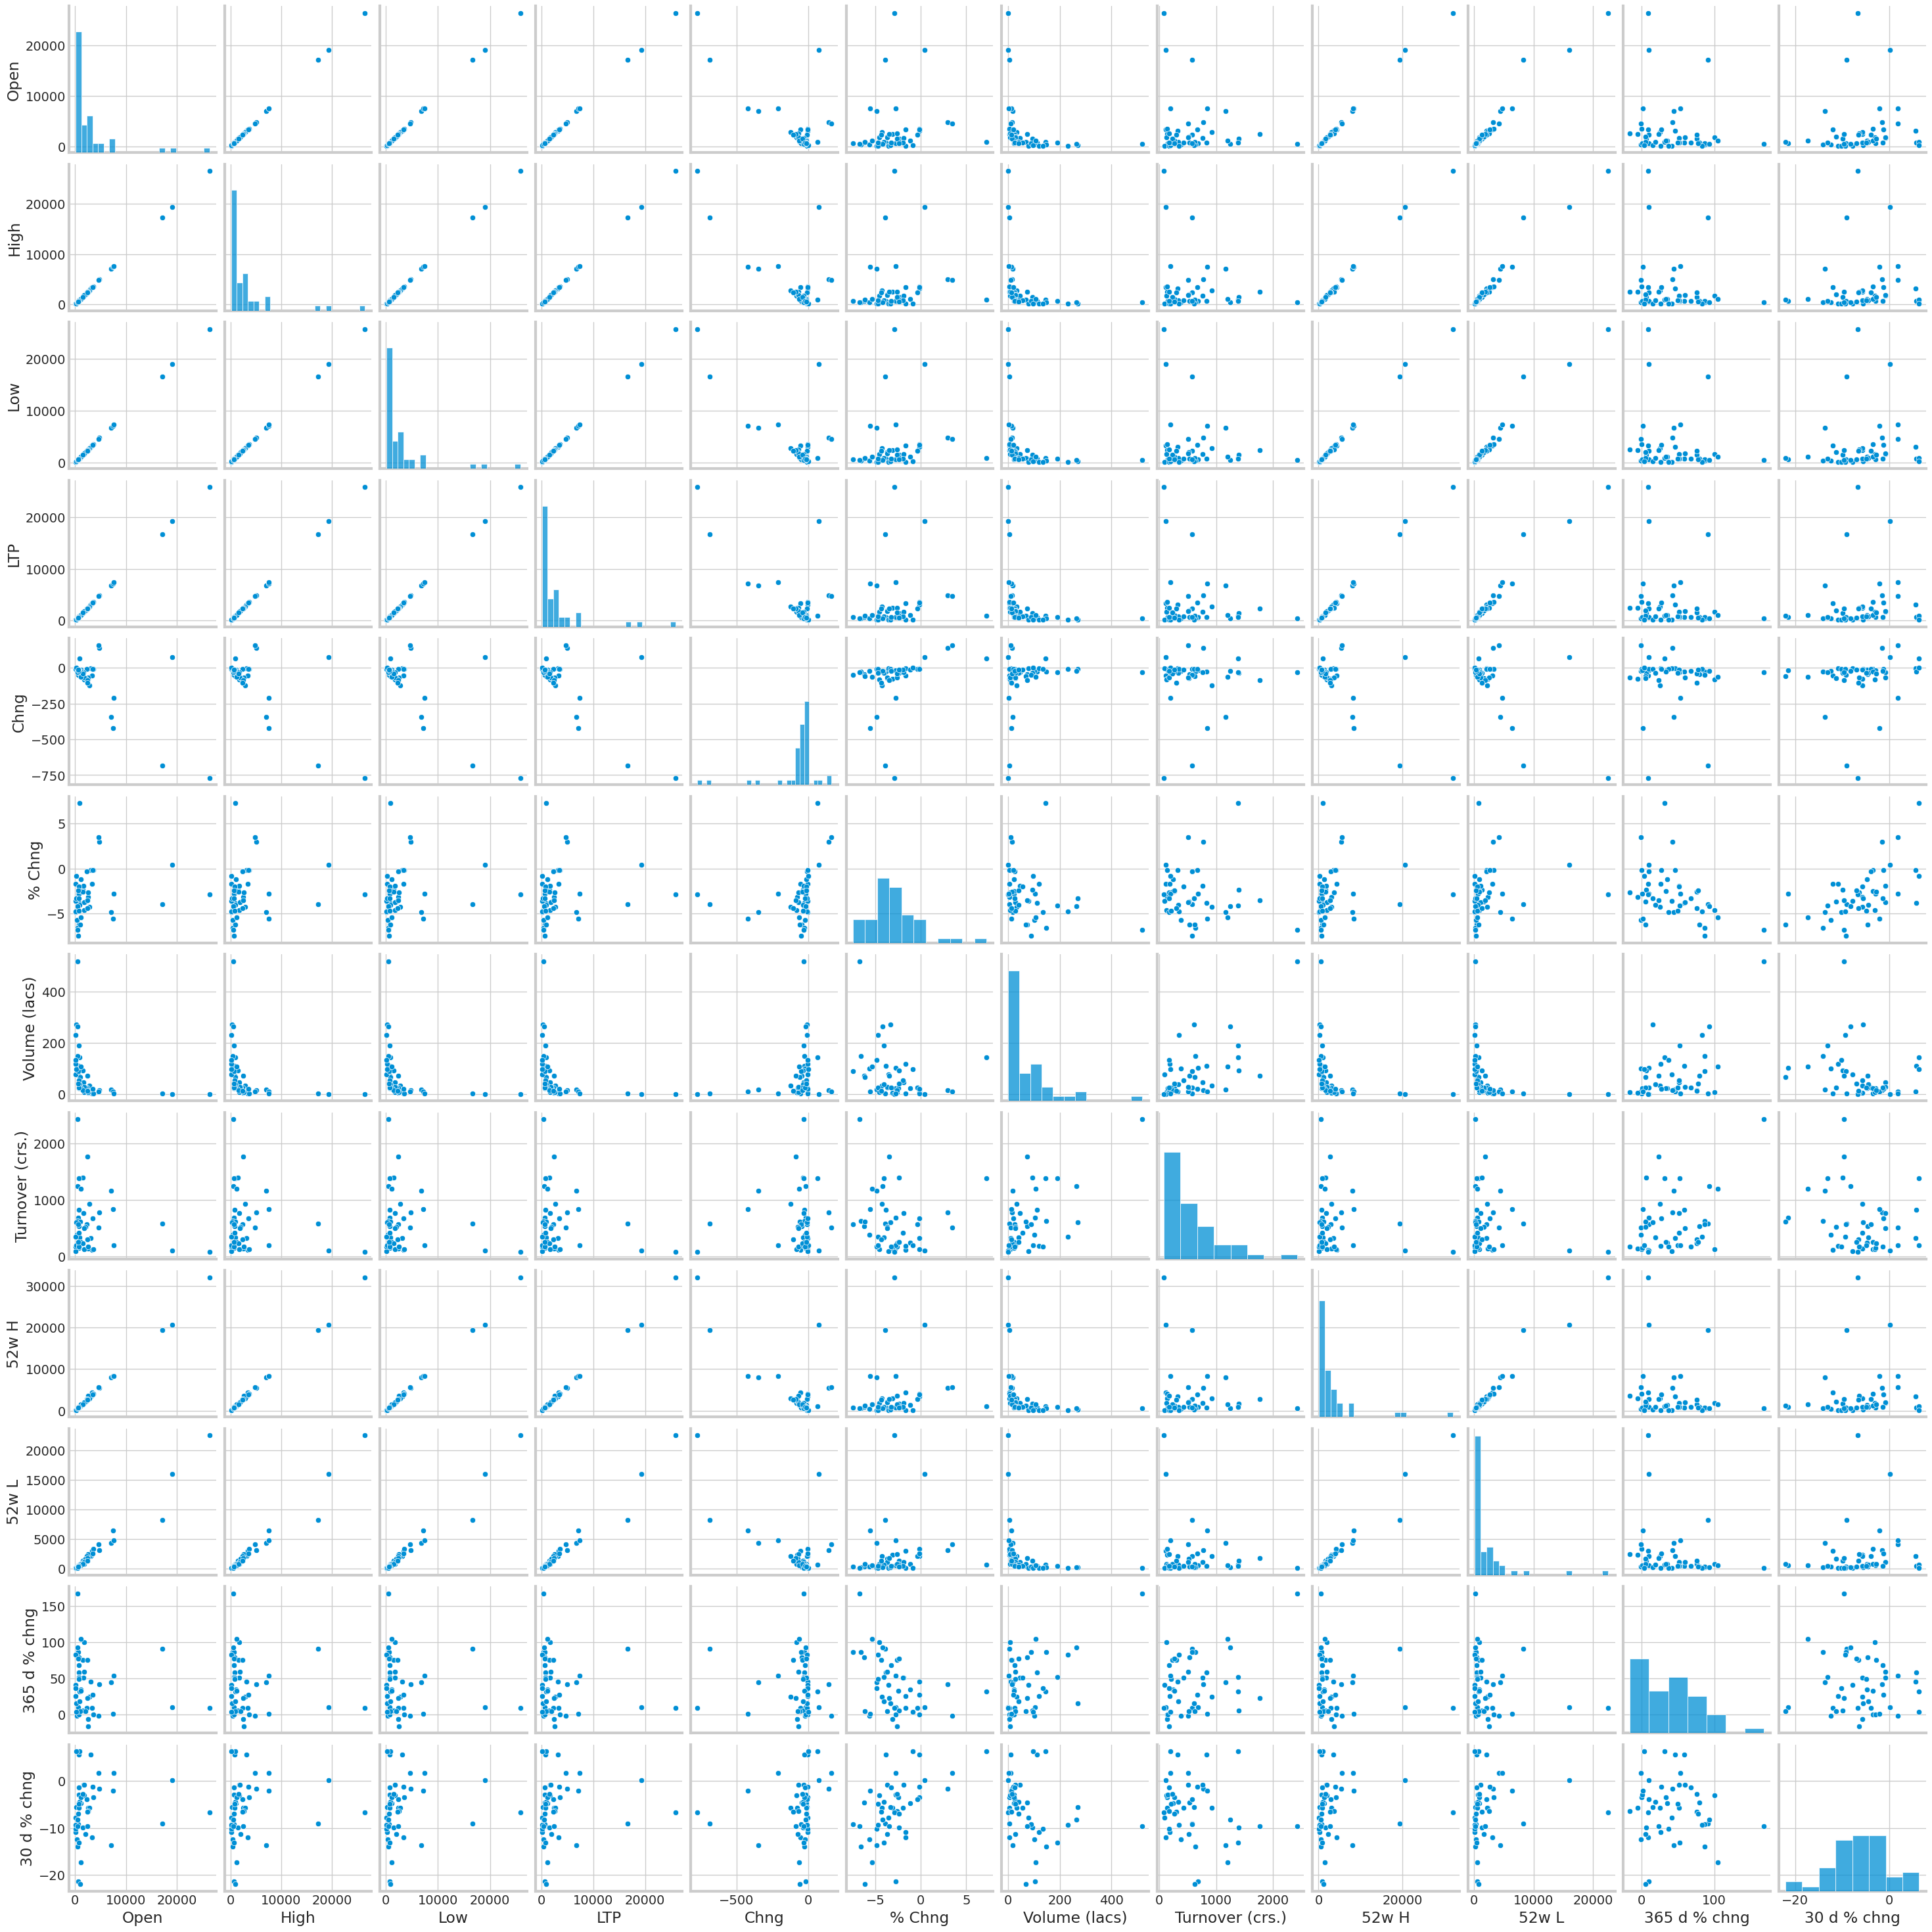

In [69]:
sns.pairplot(nf)

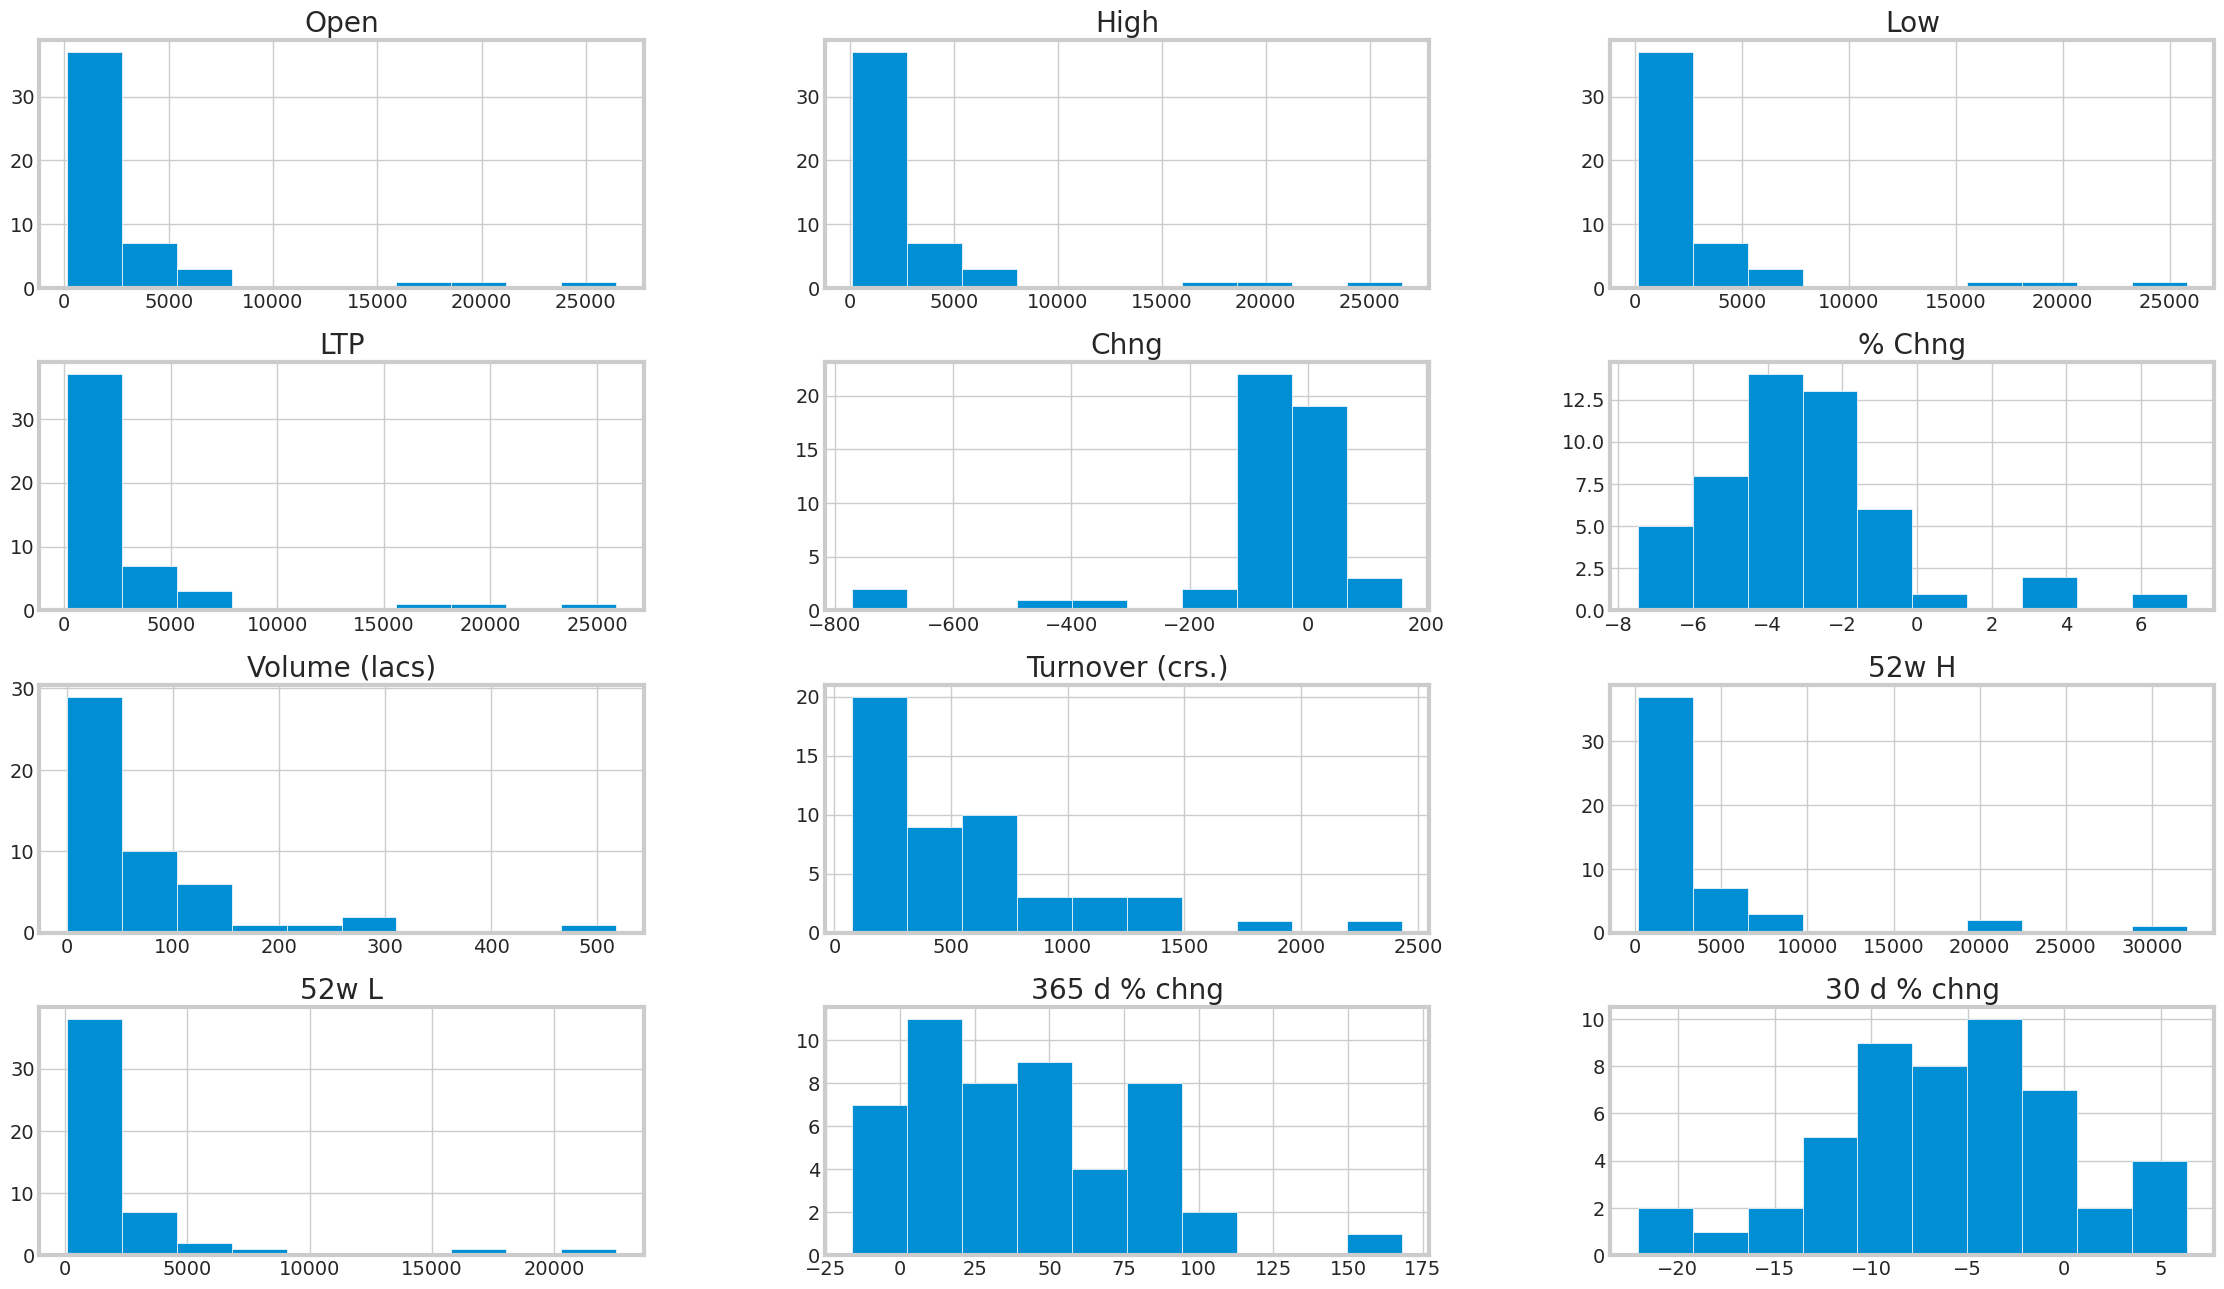

In [97]:
nf.hist(figsize=(25,15))
plt.show()

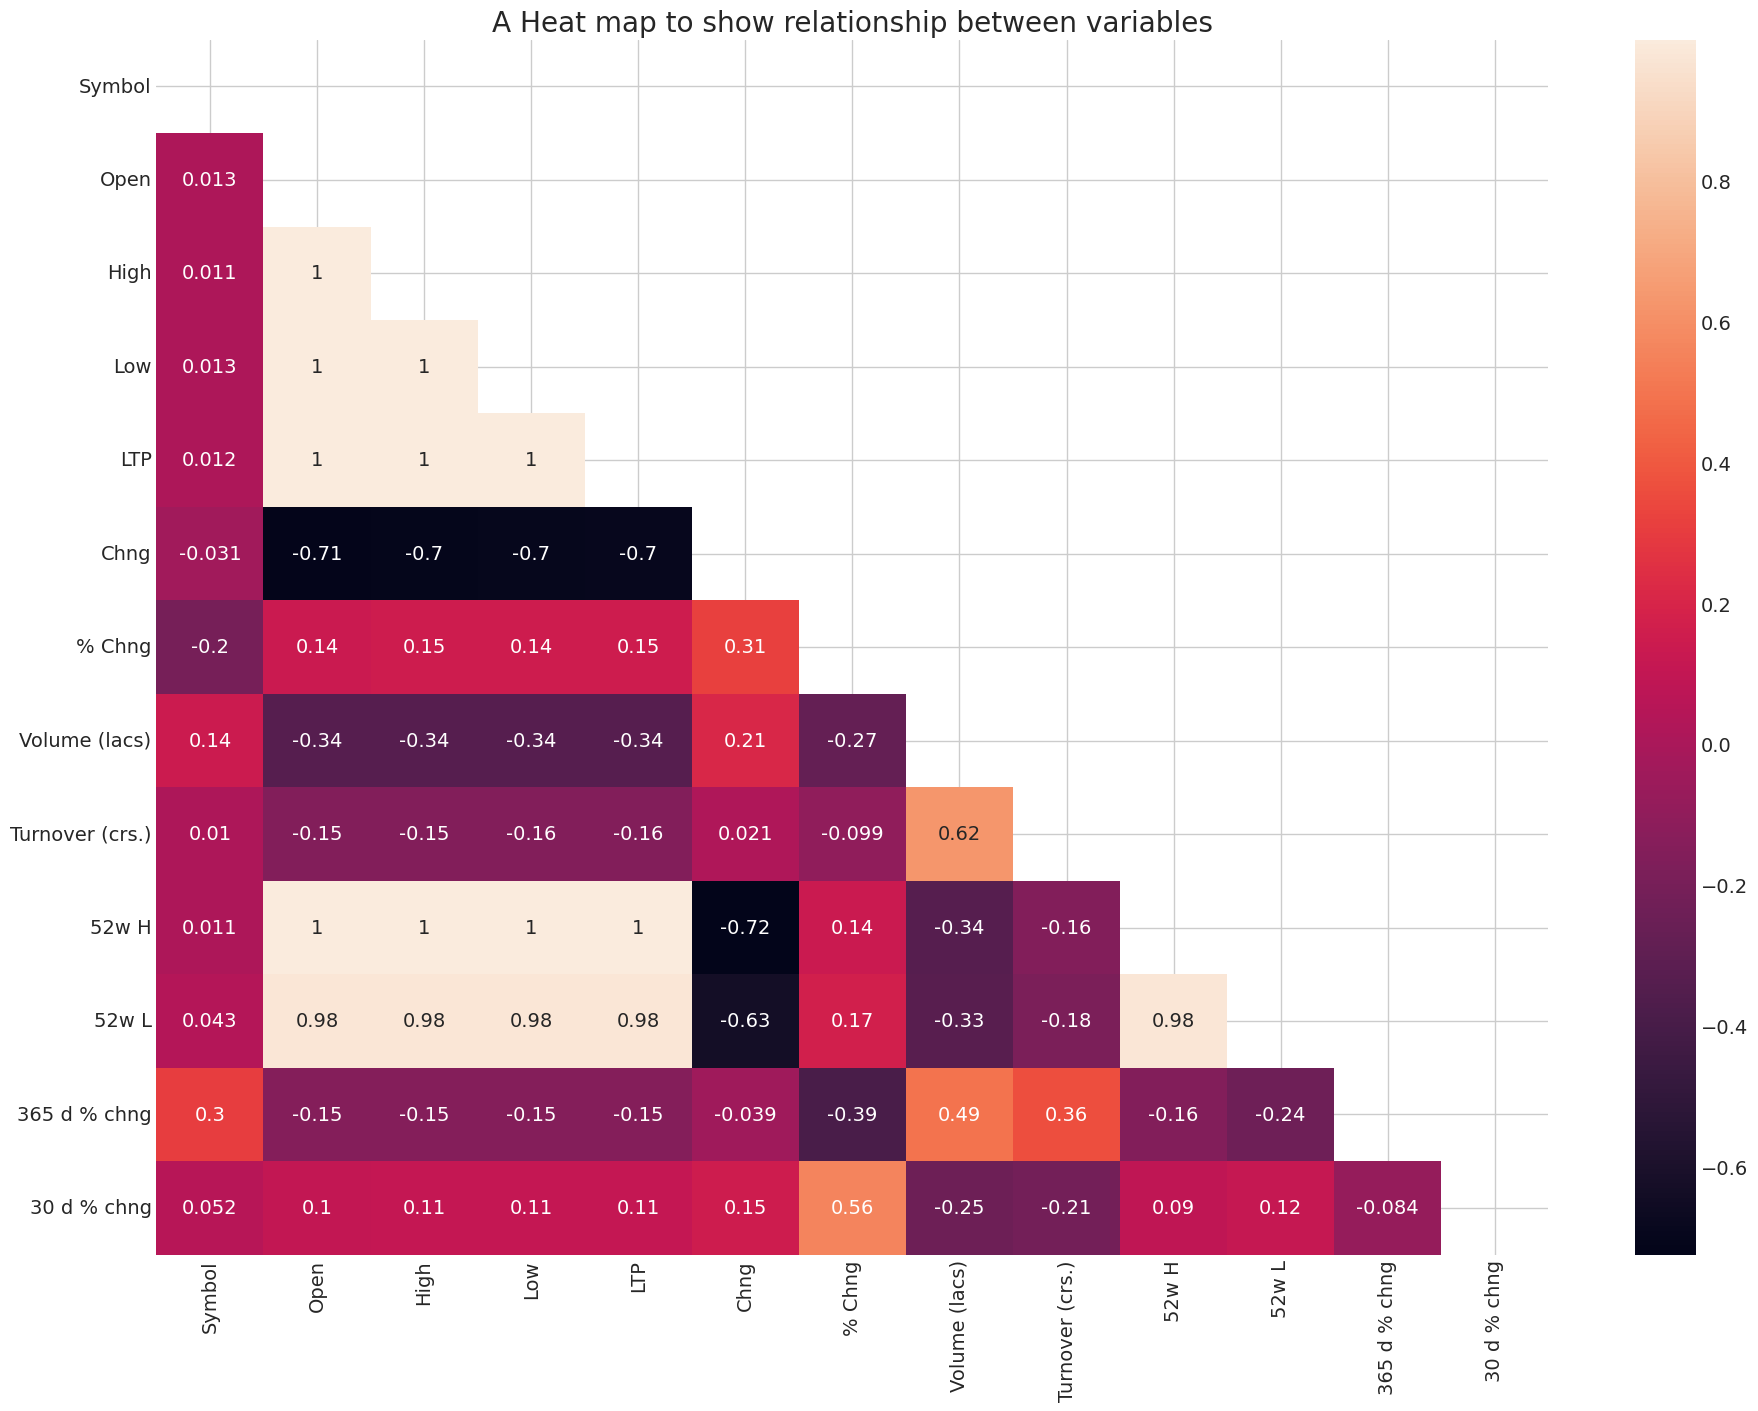

In [228]:
plt.figure(figsize=(20,15))
sns.heatmap(nf.corr(),annot=True,mask=np.triu(np.ones_like(nf.corr()))).set(title='A Heat map to show relationship between variables')

# 7- Display Data

In [128]:
display(nf_open,nf_hl,nf_ltp,nf_tv,nf_chng,nf_w),figsize=(25,15))

# 8- ML

# 8.1- Train_Test_Split

In [275]:
categorical_col = []
for column in nf.columns:
    if nf[column].dtype == object and len(nf[column].unique()) <= 50:
        categorical_col.append(column)
        
        
nf['Symbol'] = nf.Symbol.astype("category").cat.codes
label = LabelEncoder()
for column in categorical_col:
    nf[column] = label.fit_transform(nf[column])

In [276]:
x = nf.drop("52w H", axis=1)
y = nf['52w H']

In [299]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=seed)

print("Training Data Shape : ", xtrain.shape, ytrain.shape)
print("Test Data Shape : ", xtest.shape, ytest.shape)

Training Data Shape :  (40, 12) (40,)
Test Data Shape :  (10, 12) (10,)


# 8.2- ML Models

In [212]:
model_params = {
    'linear_regression':{
        'model':LinearRegression(),
        'params':{
            
        }
    },
    'Decision_Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'max_depth':[10,20,50,100],
            'random_state':[0,42]
        }
    },
    'Random_Forest':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[10,20,50,100,200]
        }
    },
    'Ridge_regression':{
        'model':Ridge(tol=0.1),
        'params':{
             'alpha':[1,10,20,50,100],
            'max_iter':[50,100,200]
        }
    },
    'Lasso_regression':{
        'model':Lasso(tol=0.1),
        'params':{
            'alpha':[1,10,20,50,100],
            'max_iter':[50,100,200]
        }
    }
    
    
}

In [213]:

score=[]
best_score = 0
second_best_score = 0
best_model = None        # This is the best model in the end of the grid search cv
second_best_model = None #This is the second best model in the end of the grid search cv
for model_name,m in model_params.items():
    clf = GridSearchCV(m['model'],m['params'],cv=5)
    clf.fit(xtrain,ytrain)
    
    if best_score<clf.best_score_:
        second_best_score =  best_score
        second_best_model =  best_model
        best_score = clf.best_score_
        best_model = clf.best_estimator_
    elif clf.best_score_>second_best_score:
        second_best_score = clf.best_score_
        second_best_model = clf.best_estimator_
    
    score.append({
        'model':model_name,
        'score':clf.best_score_,
        'param':clf.best_params_
    })
    

pd.DataFrame(score)

,model,score,param
0,linear_regression,0.987247,{}
1,Decision_Tree,0.804209,"{'max_depth': 10, 'random_state': 0}"
2,Random_Forest,0.865716,{'n_estimators': 100}
3,Ridge_regression,0.989878,"{'alpha': 100, 'max_iter': 50}"
4,Lasso_regression,0.984819,"{'alpha': 1, 'max_iter': 50}"


# 8.3- Best Models

In [214]:
best_model.score(xtest,ytest)

0.9922577575352564

In [221]:
best_model

Ridge(alpha=100, max_iter=50, tol=0.1)

In [223]:
second_best_model.score(xtest,ytest)

0.9923778565628912

In [224]:
second_best_model

LinearRegression()

In [225]:
models = {
     'Ridge_regression':best_model,
    'LinearRegression':second_best_model
}

In [226]:
result=[]
for model_name,model in models.items():
    ypred = model.predict(xtest)
    mse = mean_squared_error(ytest,ypred)
    rmse = mean_squared_error(ytest,ypred,squared = False)
    
    result.append({
        'Model':model_name,
        'MSE':mse,
        'RMSE':rmse
    }) 

pd.DataFrame(result)

,Model,MSE,RMSE
0,Ridge_regression,820724.317836,905.938363
1,LinearRegression,807993.097782,898.884363


# 8.4- XGB

In [247]:
model = XGBRegressor(n_estimator=1000,early_stopping_round=50)

model.fit(x,y)

[15:22:19] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping_round", "n_estimator" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_round=50,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimator=1000, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [248]:
model.score(xtrain,ytrain)

0.999999999999949

Dickey–Fuller test:: p=0.000000


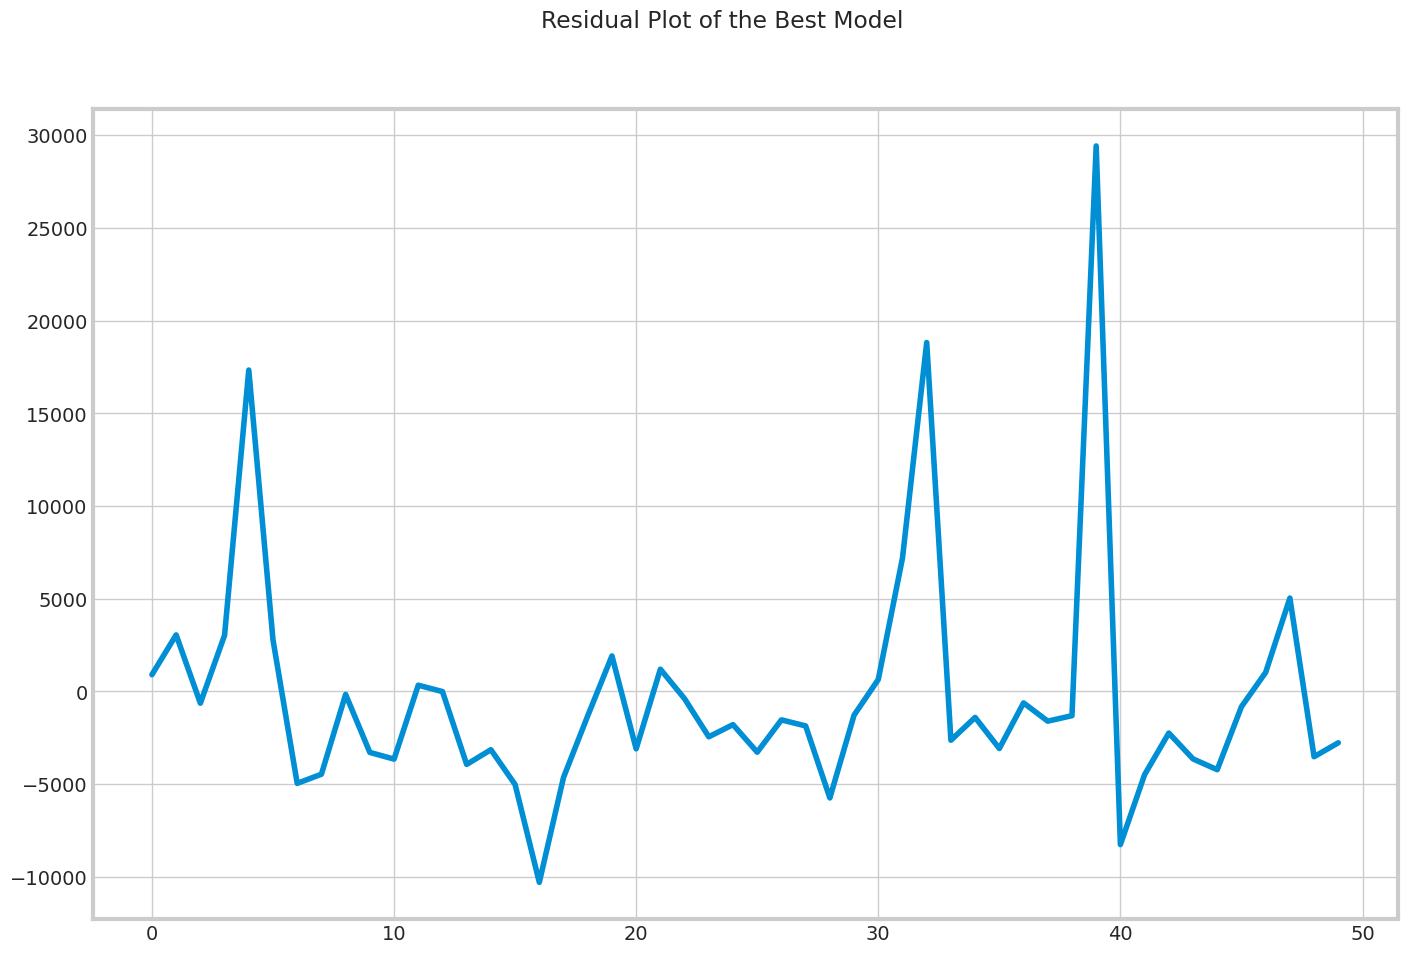

In [344]:
fig = plt.figure(figsize=(15,10))
best_model.resid.plot()
fig.suptitle('Residual Plot of the Best Model')
print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid)[1])

In [320]:
model = Sequential()

model.add(LSTM(units=96, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 12, 96)            37632     
                                                                 
 dropout_20 (Dropout)        (None, 12, 96)            0         
                                                                 
 lstm_22 (LSTM)              (None, 12, 96)            74112     
                                                                 
 dropout_21 (Dropout)        (None, 12, 96)            0         
                                                                 
 lstm_23 (LSTM)              (None, 12, 96)            74112     
                                                                 
 dropout_22 (Dropout)        (None, 12, 96)            0         
                                                                 
 lstm_24 (LSTM)              (None, 96)              

In [305]:
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)


results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(nf['52w H'], order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [306]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
7   (0, 1, 0, 1)  765.891778
8   (0, 1, 1, 0)  766.402050
9   (0, 1, 1, 1)  767.212218
10  (0, 1, 2, 0)  767.336946
13  (0, 2, 0, 1)  767.882648
                                     SARIMAX Results                                      
Dep. Variable:                              52w H   No. Observations:                   50
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -379.946
Date:                            Mon, 25 Sep 2023   AIC                            765.892
Time:                                    15:50:13   BIC                            770.725
Sample:                                         0   HQIC                           767.596
                                             - 50                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

In [307]:
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))
    
    
nf[['52w H']]

,52w H
0,901.00
1,3505.00
2,866.90
3,4361.40
4,19325.00
5,8050.00
6,781.80
7,503.00
8,4153.00
9,1005.00


In [328]:
best_model.save('NIFTY')

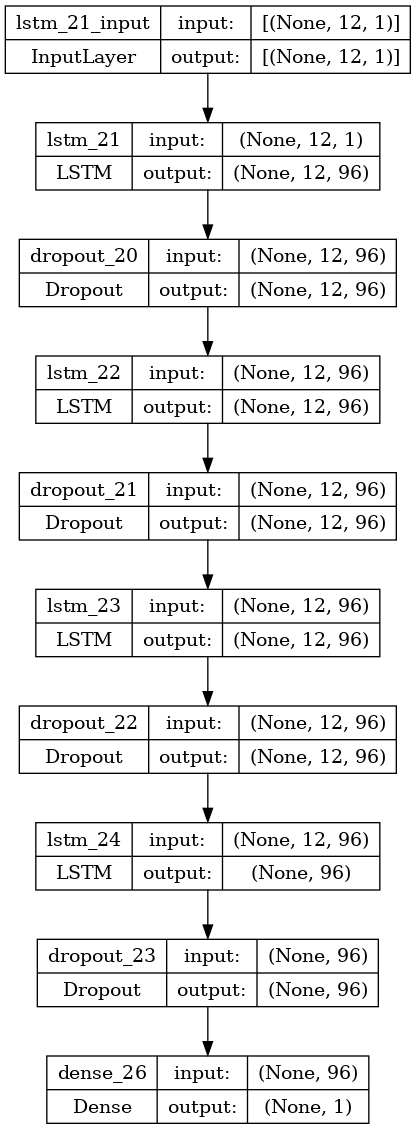

In [339]:
plot_model(model, to_file='NIFTY -50 Stocks.png', show_shapes=True, show_layer_names=True)